# Example 3 - Langmuir Hinshelwood mechanism

In this example, we will show how to build a Gaussian Process (GP) surrogate model for a Langmuir Hinshelwood (LH) mechanism and locate its optimum via Bayesian Optimization. 
In a typical LH mechanism, the reation rate can be expressed as a function of the partial pressure of two reacting species ($P_1$ and $P_2$), 
$$ rate = \frac{k_{rds} K_1 K_2 P_1 P_2}{(1 + K_1 P_1 + K_2 P_2)^2}$$
where $k_{rds}$, $K_1$ and $K_2$ are the kinetic constants. 
Here $P_1$ and $P_2$ are the independent variables X and the rate is the dependent variable Y. 
The goal is locate the $P_1$ and $P_2$ value where the rate is maximized. 

The details of this example is summarized in the table below:

| Key Item      | Description |
| :----------------- | :---------------------------- |
| Goal | Maximization |
| Objective function | LH mechanism |
| Input (X) dimension | 2 |
| Output (Y) dimension | 1 |
| Analytical form available? | Yes |
| Acqucision function | Expected improvement (EI) |
| Initial Sampling | Full factorial or latin hypercube | 

Next, we will go through each step in Bayesian Optimization.


## 1. Import `nextorch` and other packages

In [2]:
import os
import sys
project_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_path)

import numpy as np
from nextorch import plotting, bo, doe

## 2. Define the objective function 
We use a Python function object as the objective function `objective_func`. The range of the input `X_ranges` is between 0 and 1, i.e., in a unit scale. 

In [3]:
#%% Define the objective function
def rate(P): 
    '''
    langmuir hinshelwood mechanism
    X is a matrix of [P1, P2] in real units
    return r is the reactio rate
    '''
    # kinetic constants
    K1 = 1
    K2 = 10
    
    krds = 100
    
    if len(P.shape) < 2:
        P = np.array([P])
        
    r = np.zeros(P.shape[0])

    for i in range(P.shape[0]):
        P1, P2 = P[i][0], P[i][1]
        r[i] = krds*K1*K2*P1*P2/((1+K1*P1+K2*P2)**2)
    
    # Put y in a column
    r = np.expand_dims(r, axis=1)
    
    return r
# Objective function
objective_func = rate

# Set the ranges
X_ranges = [[1, 10], [1, 10]]


## 3. Define the initial sampling plan
The initial sampling plan `X_init` can be a Design of Experiment (DOE), random sampling or grid search. In this example, since the input dimension is only 1, we can just do a grid search for x with a 0.25 interval. 

The initial reponse `Y_init` is computed from the objective function.

In [4]:
# Create a grid with a 0.25 interval
X_init = np.array([[0, 0.25, 0.5, 0.75]]).T

# X_range is [0, 1], therefore we can get the reponse directly  
# from the objective function
# Get the initial responses
Y_init = objective_func(X_init)
# Equavalent to 
# Y_init = bo.eval_objective_func(X_init, X_ranges = [0,1], objective_func)

## 4. Initialize an `Experiment` object 

The `Experiment` object is the core class in `nextorch`. 

It consists of a Gaussian Process (GP) model `Exp.model` trained by the input data and an acquisition function `acq_func` which provides the next point to sample. 

Some progress status will be printed out every time when we train a GP model.


In [5]:
# Initialize an Experiment object Exp
# Set its name, the files will be saved under the folder with the same name
Exp = bo.Experiment('simple_1d') 
# Import the initial data
# Set unit_flag to true since the X is in a unit scale
Exp.input_data(X_init, Y_init, unit_flag = True)
# Set the optimization specifications 
# Here we set the objective function, minimization as the goal
Exp.set_optim_specs(objective_func = objective_func, maximize = False)

Iter 10/100: 3.3208022117614746
Iter 20/100: 3.1972315311431885
Iter 30/100: 3.1579582691192627
Iter 40/100: 3.1541290283203125
Iter 50/100: 3.1468474864959717
Iter 60/100: 3.1439647674560547
Iter 70/100: 3.14319109916687


## 5. Run trials 
We define one iteration of the experiment as a trial. 

First, the next point(s) `X_new_real` to be run are suggested by the acquisition function. Next, the reponse at this point `Y_new_real` is computed from the objective function. We generate one point per trial in this experiment.

We create a test input set `X_test` to plot the objective function and acquisition function value versus X. This process is repeated until the a stopping criteria is met.

The acquisition function Expected Improvement (EI) balances between exploitation and exploration. Generally, it is a good one to try first. 

Iteration 1, objective function


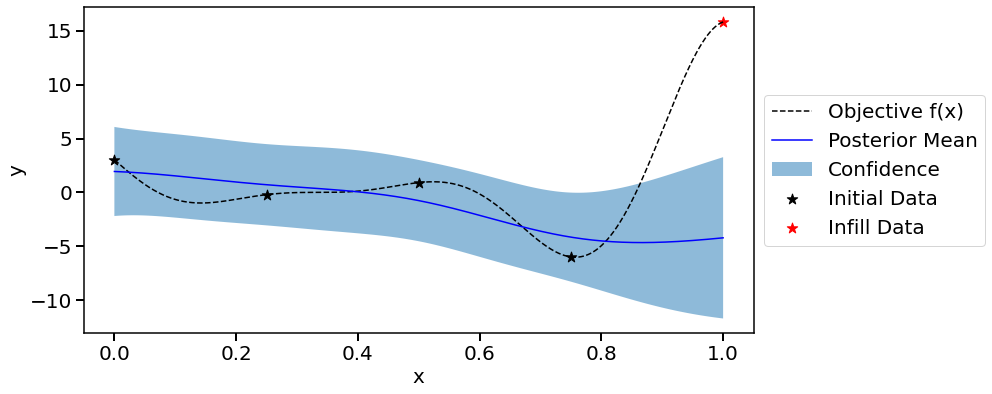

Iteration 1, acquisition function


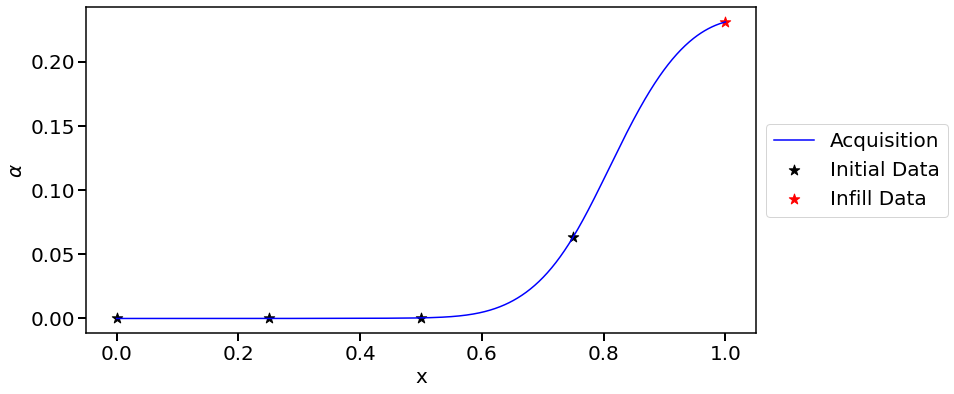

Iter 10/100: 3.8537380695343018
Iter 20/100: 3.555973529815674
Iter 30/100: 3.4725098609924316
Iter 40/100: 3.4516804218292236
Iter 50/100: 3.4431471824645996
Iter 60/100: 3.4376628398895264
Iter 70/100: 3.43487286567688
Iter 80/100: 3.43346905708313
Iter 90/100: 3.4324748516082764
Iter 100/100: 3.431739330291748
Iteration 2, objective function


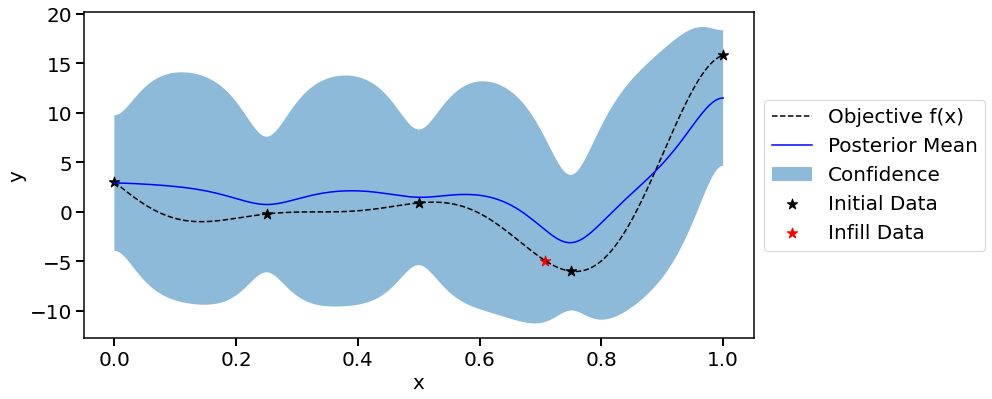

Iteration 2, acquisition function


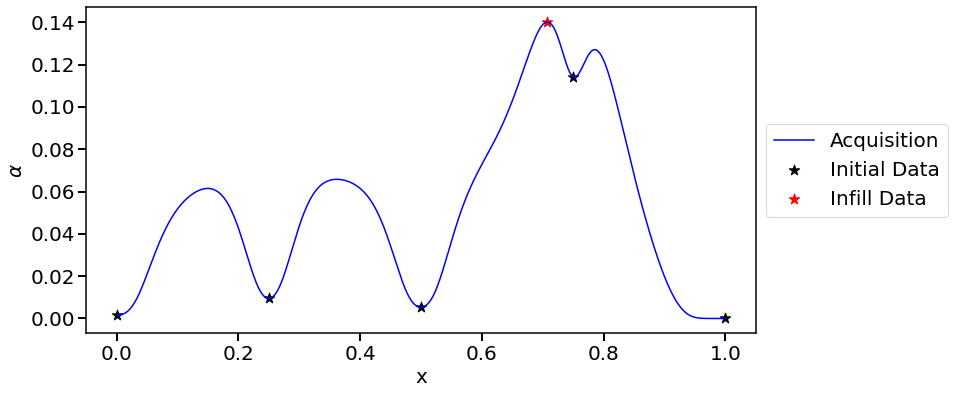

Iter 10/100: 3.114121437072754
Iter 20/100: 3.0856268405914307
Iter 30/100: 3.036919355392456
Iter 40/100: 3.0344274044036865
Iteration 3, objective function


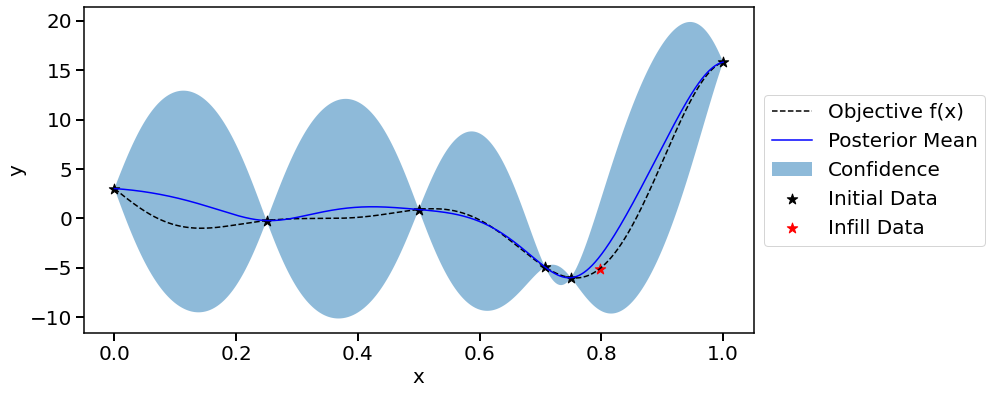

Iteration 3, acquisition function


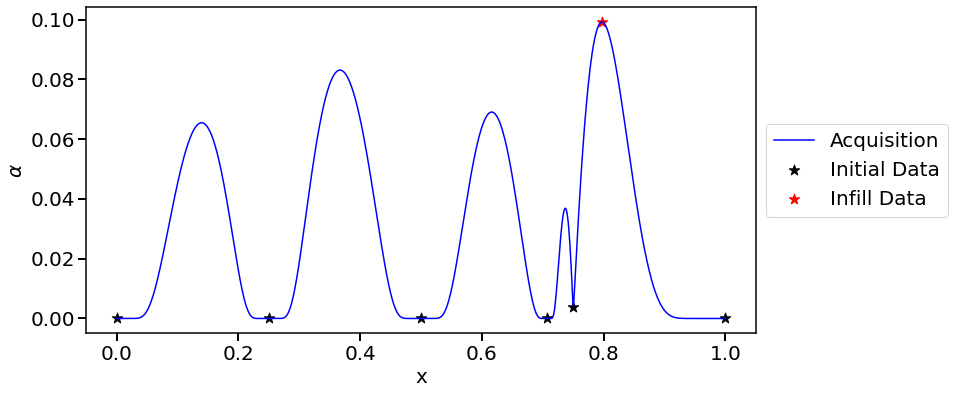

Iter 10/100: 2.681077718734741
Iter 20/100: 2.6760261058807373
Iter 30/100: 2.675145387649536
Iter 40/100: 2.674388885498047
Iter 50/100: 2.674024820327759
Iteration 4, objective function


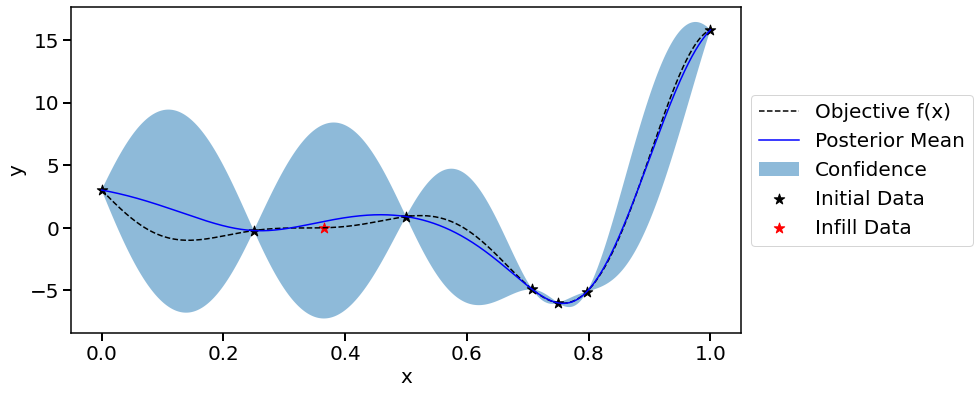

Iteration 4, acquisition function


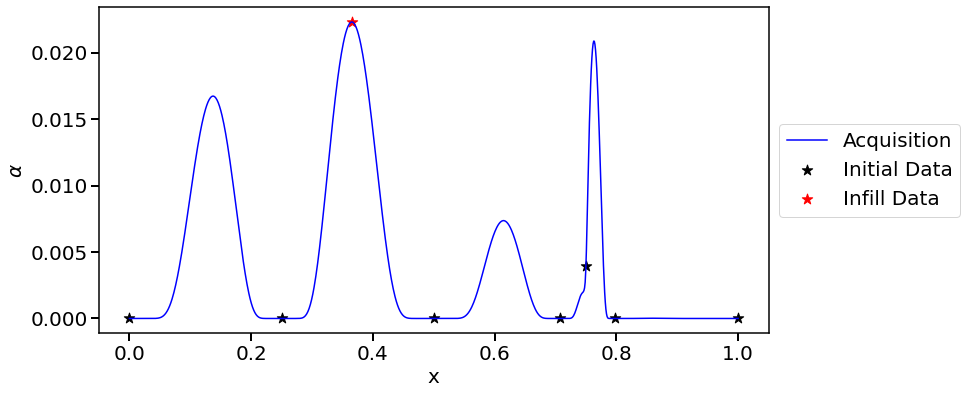

Iter 10/100: 2.4598798751831055
Iter 20/100: 2.457267999649048
Iter 30/100: 2.455829381942749
Iter 40/100: 2.4551117420196533
Iter 50/100: 2.4547336101531982
Iteration 5, objective function


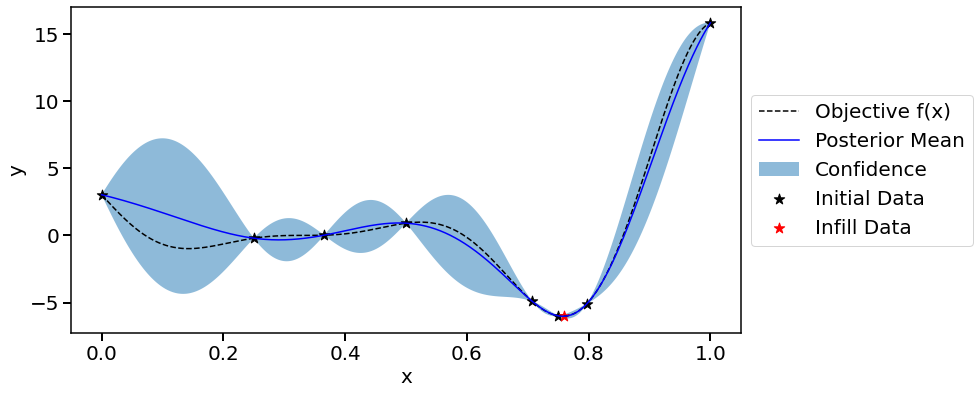

Iteration 5, acquisition function


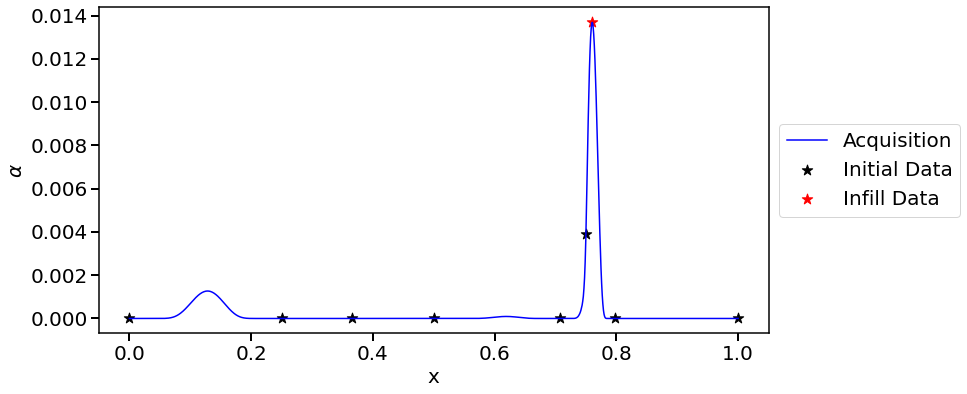

Iter 10/100: 1.8654226064682007
Iter 20/100: 1.862224817276001
Iter 30/100: 1.860758662223816
Iter 40/100: 1.8596396446228027
Iter 50/100: 1.8590494394302368
Iteration 6, objective function


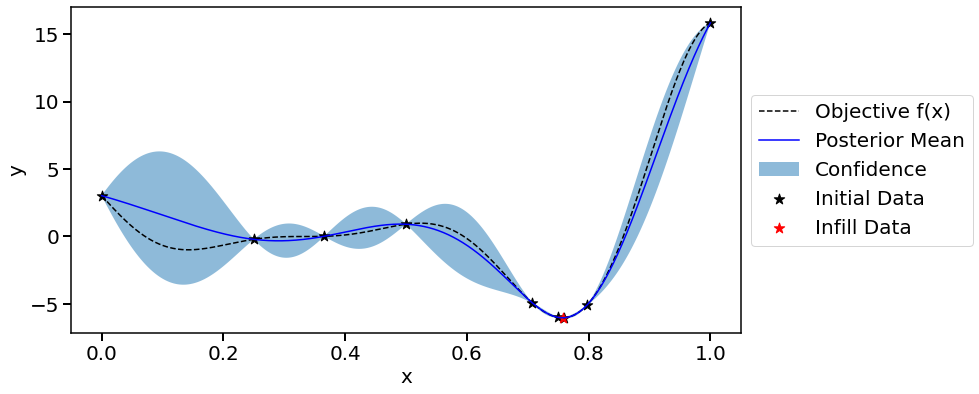

Iteration 6, acquisition function


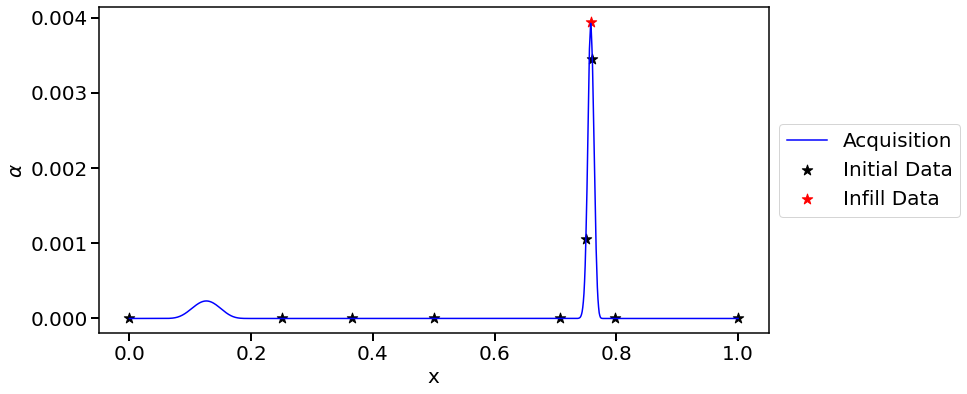

Iter 10/100: 1.3278197050094604
Iteration 7, objective function


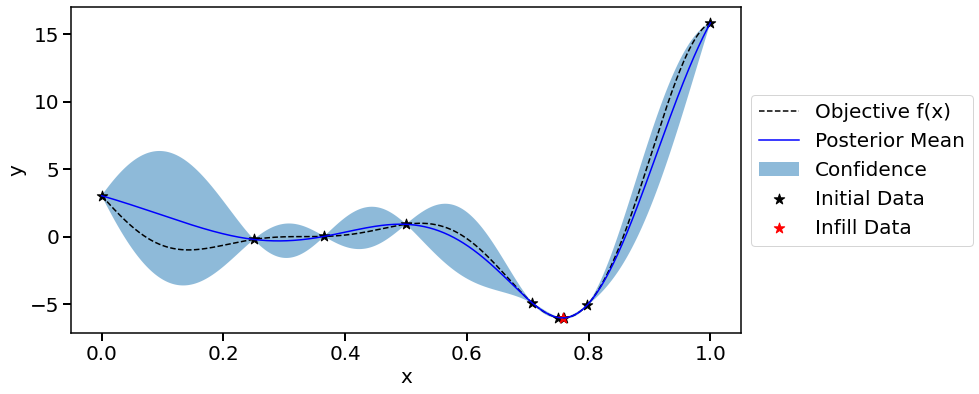

Iteration 7, acquisition function


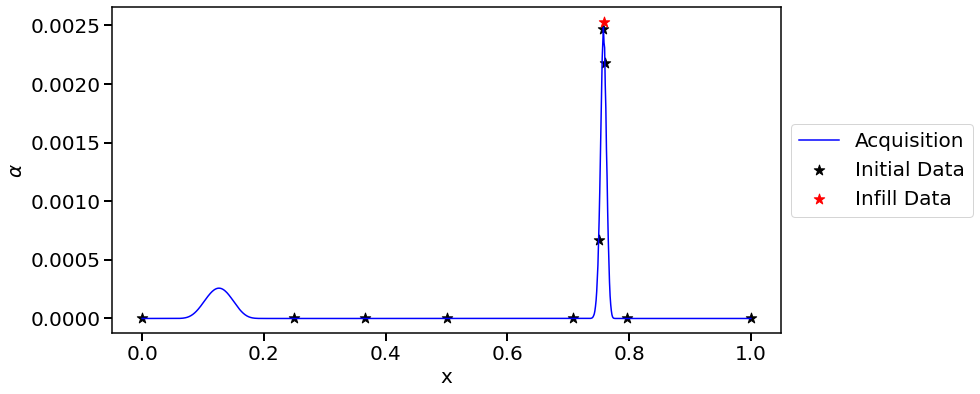

Iter 10/100: 0.8862019181251526
Iteration 8, objective function


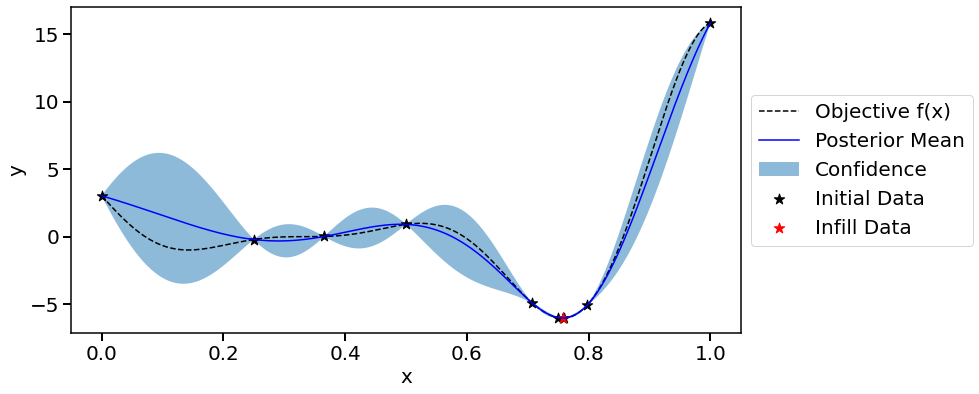

Iteration 8, acquisition function


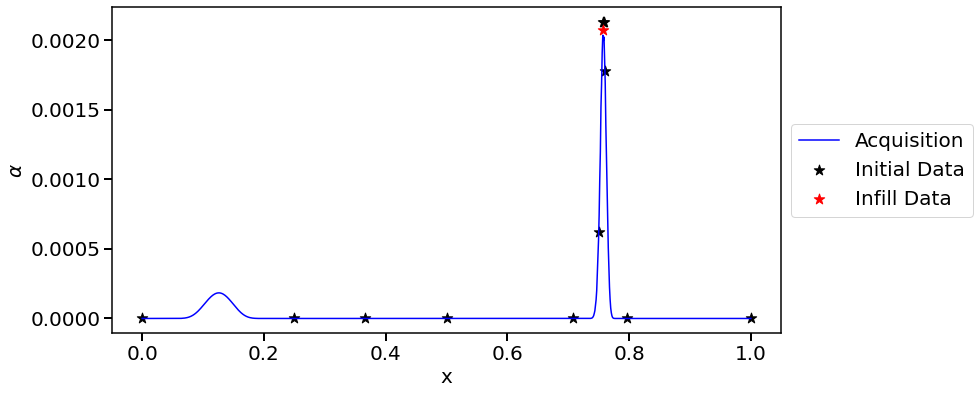

Iter 10/100: 0.5151469707489014
Iteration 9, objective function


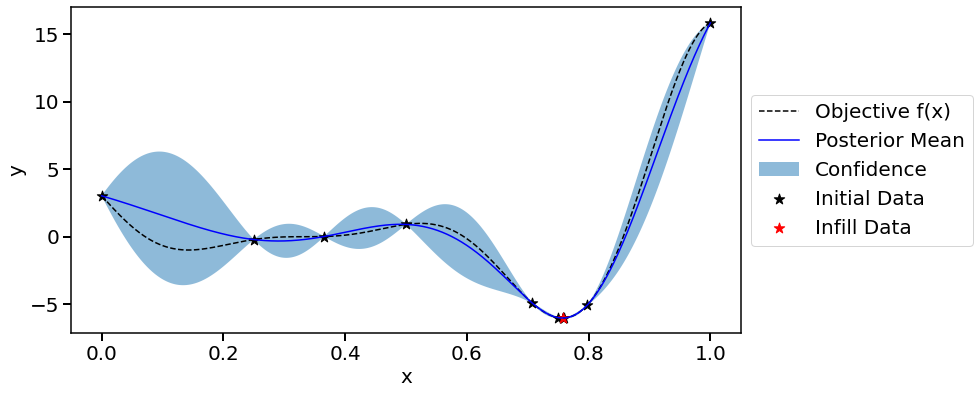

Iteration 9, acquisition function


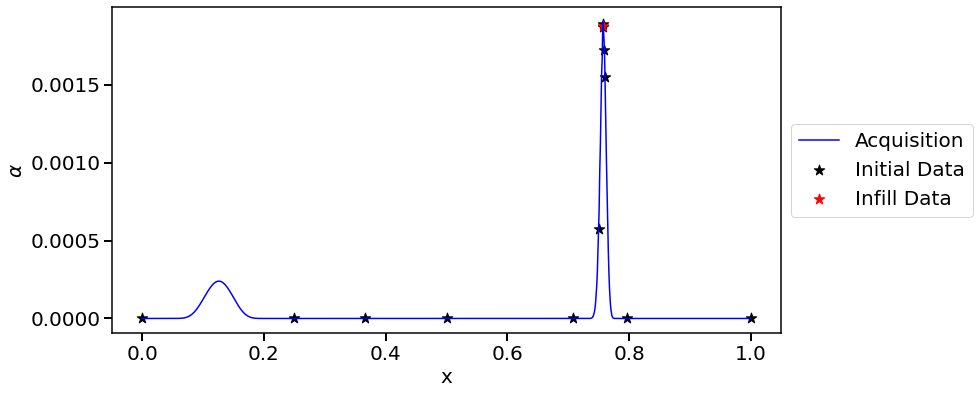

Iter 10/100: 0.1996937394142151
Iteration 10, objective function


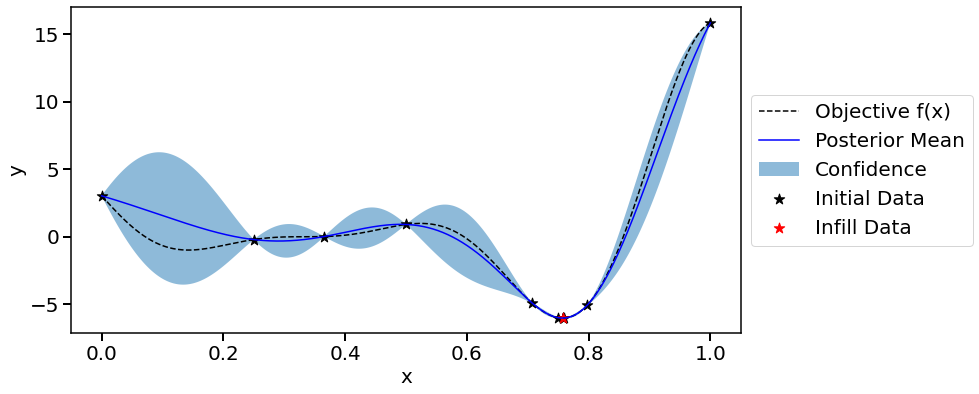

Iteration 10, acquisition function


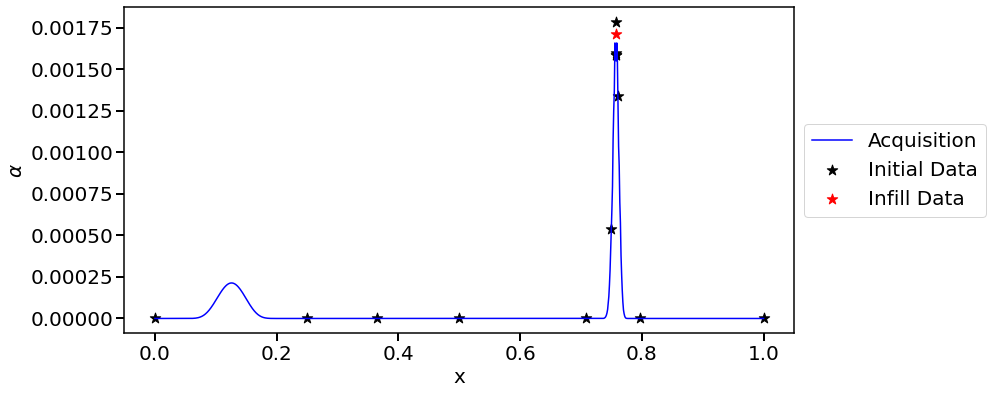

Iter 10/100: -0.07187143713235855


In [6]:
# Create test data points for plotting
X_test = np.linspace(0, 1, 1000)

# Set a flag for saving png figures
save_fig_flag = False

# Set the number of iterations  
n_trials = 10

# Optimization loop
for i in range(n_trials):
    # Generate the next experiment point
    # X_new is in a unit scale
    # X_new_real is in a real scale defined in X_ranges
    # Select EI as the acquisition function 
    X_new, X_new_real, acq_func = Exp.generate_next_point(acq_func_name = 'EI')
    # Get the reponse at this point
    Y_new_real = objective_func(X_new_real)
    
    # Plot the objective functions, and acqucision function
    print('Iteration {}, objective function'.format(i+1))
    plotting.objective_func_1d_exp(Exp, X_test = X_test, X_new = X_new, plot_real = True, save_fig = save_fig_flag)
    print('Iteration {}, acquisition function'.format(i+1))
    plotting.acq_func_1d_exp(Exp, X_test = X_test, X_new = X_new, save_fig = save_fig_flag)
    
    # Input X and Y of the next point into Exp object
    # Retrain the model 
    Exp.run_trial(X_new, X_new_real, Y_new_real)


## 6. Validate the final model
We can get the optimum value from the `Experiment` object and validate the GP model predictions on the training data. The parity plots below show that the GP model agrees well with objective function values. 

The best reponse is Y = -6.020654972896625 at X = [0.75764769]


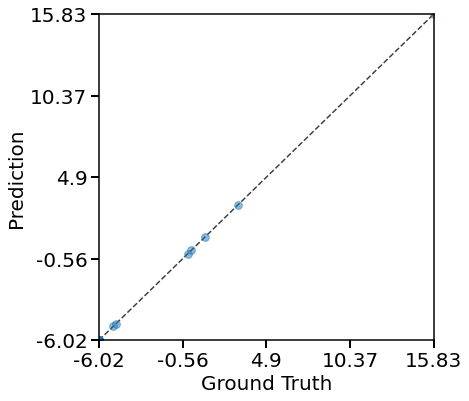

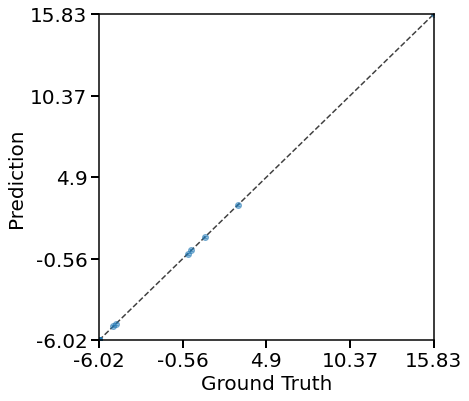

In [7]:
# Obtain the optimum
y_opt, X_opt, index_opt = Exp.get_optim()
print('The best reponse is Y = {} at X = {}'.format(y_opt, X_opt))

# Make a parity plot comparing model predictions versus ground truth values
plotting.parity_exp(Exp, save_fig = save_fig_flag)
# Make a parity plot with the confidence intervals on the predictions
plotting.parity_with_ci_exp(Exp, save_fig = save_fig_flag)